<a href="https://colab.research.google.com/github/MSoumen/Practice-With-TensorFlow/blob/master/Real_world_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# ImageDataGenarator is a Data agumantion tool for image, it creates many images from one image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Build a generator
datagen= ImageDataGenerator(rescale=1./255)


In [3]:
# download the horse-human data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-10 04:41:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   108MB/s    in 1.3s    

2020-06-10 04:41:17 (108 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
# unzip the data and save in subfolders
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse19-6.png', 'horse39-5.png', 'horse40-3.png', 'horse38-0.png', 'horse46-3.png', 'horse10-4.png', 'horse18-9.png', 'horse32-5.png', 'horse04-5.png', 'horse25-0.png']
['human11-12.png', 'human07-03.png', 'human06-07.png', 'human03-02.png', 'human16-24.png', 'human04-11.png', 'human03-16.png', 'human15-26.png', 'human10-01.png', 'human05-30.png']


In [7]:
print('Total traning horse images :', len(train_horse_names))
print('Total traning human images :', len(train_human_names))

Total traning horse images : 500
Total traning human images : 527


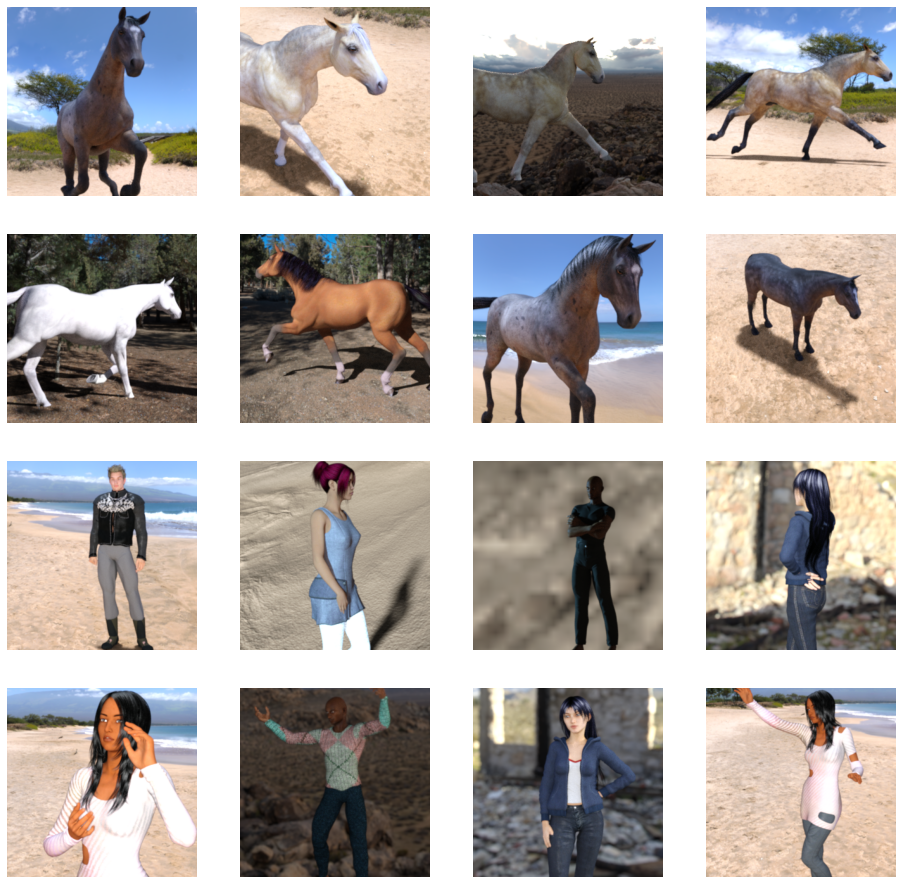

In [8]:
## See those images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
train_gen= datagen.flow_from_directory('/tmp/horse-or-human', target_size=(300,300), batch_size=128, class_mode='binary')


Found 1027 images belonging to 2 classes.


In [0]:
# make a model with cnn
import tensorflow as tf

In [0]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', data_format='channels_last', input_shape=(300,300,3)), # small the input shape to comppact images
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
# Compile the model
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [13]:
history = model.fit(
      train_gen,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 5s 645ms/step - loss: 5.5937 - acc: 0.5322
Epoch 2/15
8/8 [==============================] - 6s 715ms/step - loss: 0.4853 - acc: 0.7475
Epoch 3/15
8/8 [==============================] - 5s 640ms/step - loss: 0.9628 - acc: 0.7097
Epoch 4/15
8/8 [==============================] - 5s 638ms/step - loss: 0.1320 - acc: 0.9611
Epoch 5/15
8/8 [==============================] - 5s 625ms/step - loss: 0.0742 - acc: 0.9766
Epoch 6/15
8/8 [==============================] - 5s 620ms/step - loss: 0.0830 - acc: 0.9722
Epoch 7/15
8/8 [==============================] - 5s 607ms/step - loss: 1.7065 - acc: 0.8799
Epoch 8/15
8/8 [==============================] - 5s 602ms/step - loss: 0.3970 - acc: 0.8765
Epoch 9/15
8/8 [==============================] - 5s 611ms/step - loss: 0.0340 - acc: 0.9900
Epoch 10/15
8/8 [==============================] - 6s 706ms/step - loss: 0.0565 - acc: 0.9800
Epoch 11/15
8/8 [==============================] - 5s 610ms/step - lo

In [22]:
# Upload yor own photos and prediction cell
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded= files.upload()

for fn in uploaded.keys():

  #predicting image
  path='/content/' + fn
  img= image.load_img(path, target_size=(300,300))
  x= image.img_to_array(img)
  x= np.expand_dims(x, axis=0)

  images= np.vstack([x])
  classes= model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + "is a human")
  else:
    print(fn+"is a Horse")

Saving human1.jpg to human1 (1).jpg
[0.]
human1.jpgis a Horse


In [18]:
# Now using validation 
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')



--2020-06-10 04:48:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  41.2MB/s    in 0.3s    

2020-06-10 04:48:28 (41.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [19]:
test_gen= datagen.flow_from_directory('/tmp/validation-horse-or-human', target_size=(300,300), batch_size=128, class_mode='binary')

Found 256 images belonging to 2 classes.


In [20]:
history = model.fit(
      train_gen,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = test_gen,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 7s 840ms/step - loss: 0.0997 - acc: 0.9755 - val_loss: 4.2441 - val_acc: 0.5508
Epoch 2/15
8/8 [==============================] - 7s 817ms/step - loss: 0.1677 - acc: 0.9232 - val_loss: 2.6627 - val_acc: 0.7344
Epoch 3/15
8/8 [==============================] - 7s 821ms/step - loss: 0.0045 - acc: 1.0000 - val_loss: 2.5915 - val_acc: 0.7930
Epoch 4/15
8/8 [==============================] - 7s 816ms/step - loss: 0.0014 - acc: 1.0000 - val_loss: 3.2103 - val_acc: 0.7695
Epoch 5/15
8/8 [==============================] - 7s 870ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 3.0768 - val_acc: 0.7969
Epoch 6/15
8/8 [==============================] - 7s 819ms/step - loss: 3.0082e-04 - acc: 1.0000 - val_loss: 3.2766 - val_acc: 0.8008
Epoch 7/15
8/8 [==============================] - 7s 820ms/step - loss: 1.9848e-04 - acc: 1.0000 - val_loss: 3.5620 - val_acc: 0.7969
Epoch 8/15
8/8 [==============================] - 7s 826ms/step - loss: 1.1554e-04

In [0]:
#......... Now running the prediction cell......

See the intermidiet layers

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


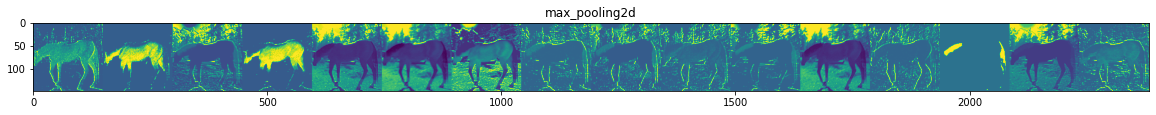

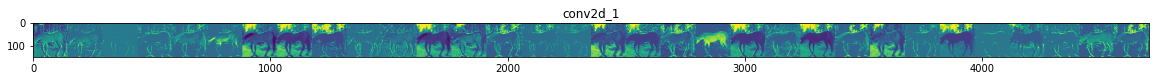

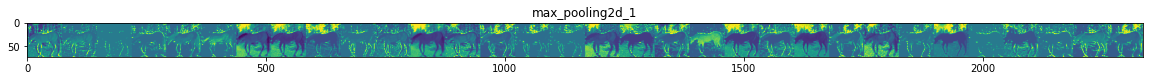

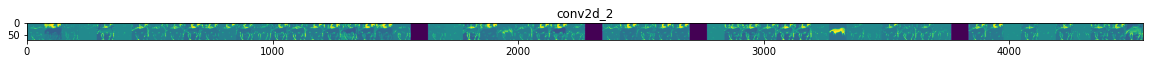

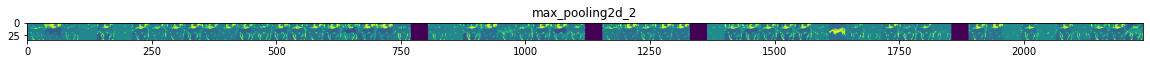

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')